In the name of GOD

"""
Project Title: Temporal Patterns and Predictive Insights in Ethereum Prices: A BiLSTM Approach

Description:
This Python script implements a Bidirectional Long Short-Term Memory (BiLSTM) model to analyze and predict Ethereum price movements. It encompasses data preprocessing, model training, evaluation, and prediction phases, aimed at providing insights into the volatile cryptocurrency market.

Author:**Dr. Mahdi Pourabdollah**
Contact Information:
    Email: Mahdi.Poorabdollah@gmail.com
    
    **LinkedIn: https://www.linkedin.com/in/dr-mahdi-pourabdollah-89191516b/?lipi=urn%3Ali%3Apage%3Ad_flagship3_feed%3BipO3AwsWRMeGvvE9RvcQxQ%3D%3D**

    **GitHub: https://github.com/mahdi1365522/desktop-tutorial/blob/master/ethereum_price_prediction_bilstm.ipynb**
    
Please feel free to reach out for collaboration, questions, or feedback related to this project.

Disclaimer:
This script is part of a research project and is intended for educational and research purposes only. The author is not responsible for any financial loss or implication resulting from the use of this script in trading or investment activities.
"""


"Temporal Patterns and Predictive Insights in Ethereum Prices: A BiLSTM Approach"

In the rapidly evolving world of cryptocurrency, Ethereum stands out as a beacon of potential and volatility. The decentralized nature of cryptocurrency markets, combined with the intricate interplay of supply, demand, technological advancements, and investor sentiment, creates a complex and dynamic trading environment. This project, titled "Temporal Patterns and Predictive Insights in Ethereum Prices: A BiLSTM Approach," aims to navigate this intricate landscape by employing advanced machine learning techniques to uncover patterns and predict future price movements of Ethereum (ETH) against the USDT (Tether).

Leveraging the Bidirectional Long Short-Term Memory (BiLSTM) model, this study delves into the historical price data of Ethereum, analyzing its open, high, low, and close prices over specific time intervals. The BiLSTM model, known for its proficiency in capturing temporal dependencies and its ability to process data points in both forward and backward directions, is particularly suited for the time-series data inherent in financial markets. By understanding the past and present dynamics of Ethereum prices, this project endeavors to provide a sophisticated analysis and forecasting tool that could significantly enhance trading strategies and decision-making processes in the volatile cryptocurrency market.

The goal is not only to illustrate the efficacy of BiLSTM models in financial forecasting but also to explore the unique characteristics of the cryptocurrency market through the lens of Ethereum, one of its most prominent assets. This introduction sets the stage for a comprehensive exploration of the methodology, findings, and implications of applying cutting-edge AI techniques to the financial domain, promising valuable insights for investors, traders, and researchers alike.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model, Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, RepeatVector, Permute, multiply, Activation, Lambda, concatenate, Flatten, BatchNormalization, Bidirectional, TimeDistributed, Wrapper
from tensorflow.keras import activations
from tensorflow.keras import backend as K
import keras
from sklearn import preprocessing

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Kucoin.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check for and handle missing values, for example, by filling them
df.fillna(method='ffill', inplace=True)

In [3]:
df.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT
0,1546300800,2019-01-01 00:00:00,ETH/USDT,131.361407,132.172291,131.173792,131.864147,68.428160,8997.509501
1,1546304400,2019-01-01 01:00:00,ETH/USDT,131.670000,131.761773,130.852452,131.185498,99.777430,13111.043980
2,1546308000,2019-01-01 02:00:00,ETH/USDT,131.231926,131.260690,130.082442,130.593948,152.773024,19983.456310
3,1546311600,2019-01-01 03:00:00,ETH/USDT,130.840632,131.432148,130.840632,131.227012,27.312334,3580.493322
4,1546315200,2019-01-01 04:00:00,ETH/USDT,131.352223,133.943697,131.294581,132.261349,585.639000,78079.217030


In [4]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [5]:
df.head ()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,year,month,day,hour
0,1546300800,2019-01-01 00:00:00,ETH/USDT,131.361407,132.172291,131.173792,131.864147,68.428160,8997.509501,2019,1,1,0
1,1546304400,2019-01-01 01:00:00,ETH/USDT,131.670000,131.761773,130.852452,131.185498,99.777430,13111.043980,2019,1,1,1
2,1546308000,2019-01-01 02:00:00,ETH/USDT,131.231926,131.260690,130.082442,130.593948,152.773024,19983.456310,2019,1,1,2
3,1546311600,2019-01-01 03:00:00,ETH/USDT,130.840632,131.432148,130.840632,131.227012,27.312334,3580.493322,2019,1,1,3
4,1546315200,2019-01-01 04:00:00,ETH/USDT,131.352223,133.943697,131.294581,132.261349,585.639000,78079.217030,2019,1,1,4


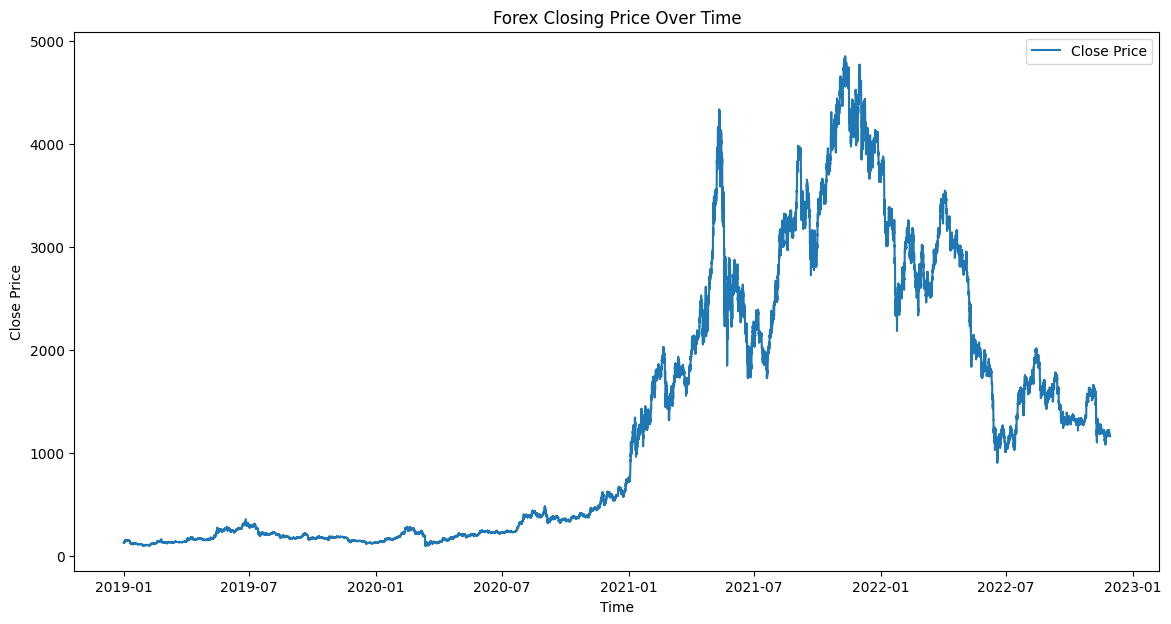

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.title('Forex Closing Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

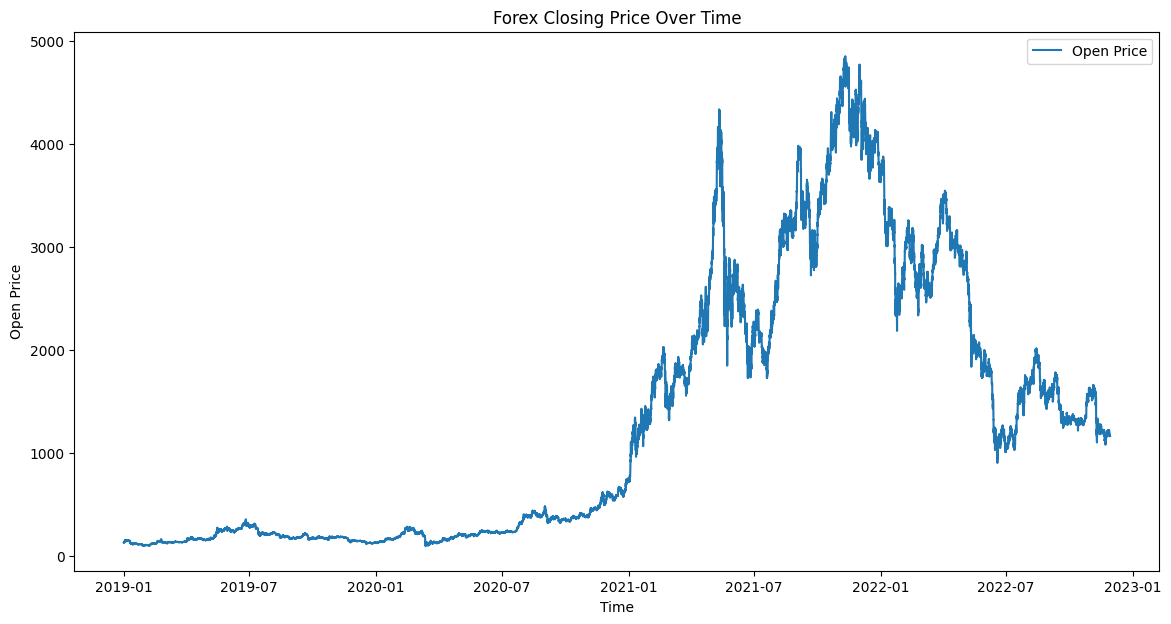

In [7]:
# Plotting the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['open'], label='Open Price')
plt.title('Forex Closing Price Over Time')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()

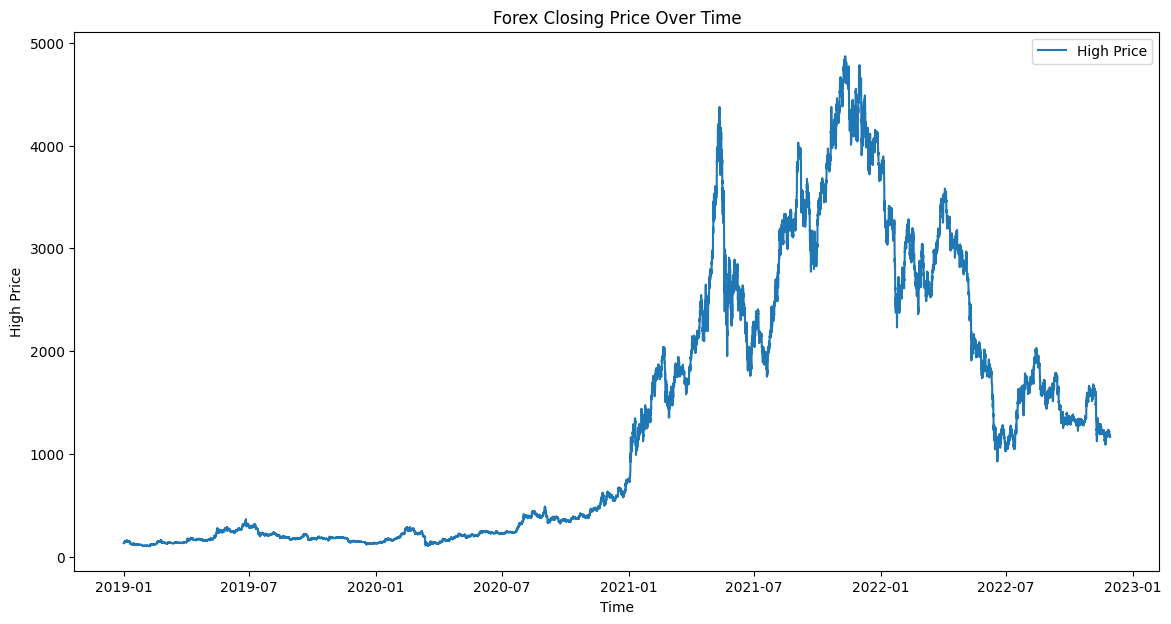

In [8]:
# Plotting the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['high'], label='High Price')
plt.title('Forex Closing Price Over Time')
plt.xlabel('Time')
plt.ylabel('High Price')
plt.legend()
plt.show()

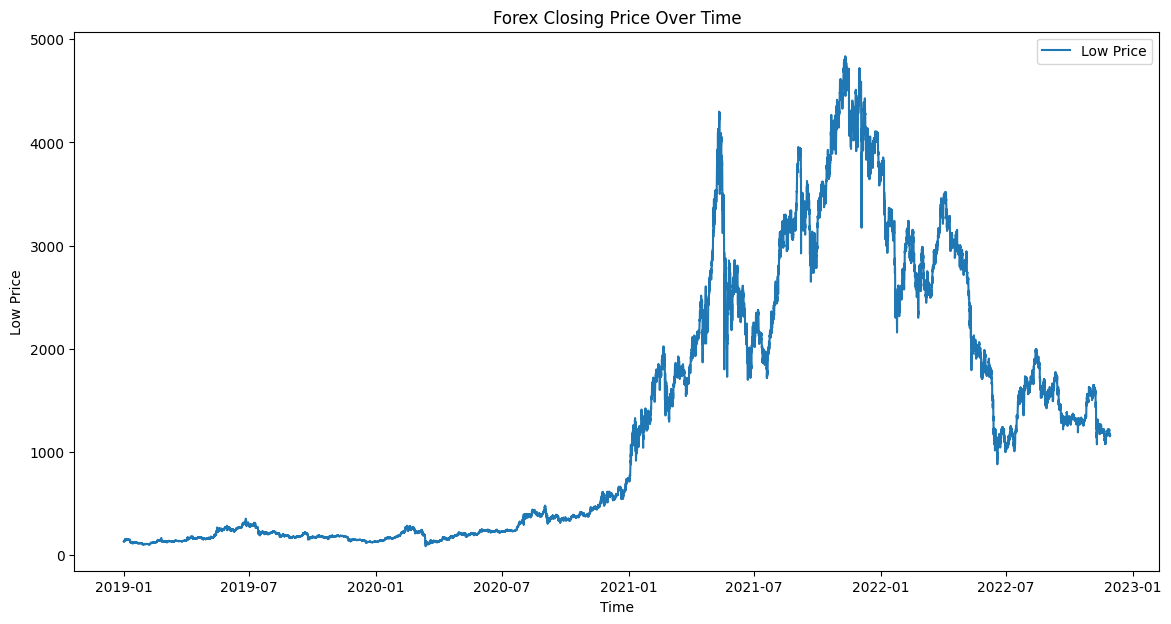

In [9]:
# Plotting the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['low'], label='Low Price')
plt.title('Forex Closing Price Over Time')
plt.xlabel('Time')
plt.ylabel('Low Price')
plt.legend()
plt.show()

In [10]:

# Define window sizes
window_sizes = [3, 6, 9, 12, 14, 18, 24]

# Calculate RSI
def calculate_rsi(df, column='close', window=14):
    df['delta'] = df[column].diff()
    df['gain'] = df['delta'].apply(lambda x: x if x > 0 else 0)
    df['loss'] = df['delta'].apply(lambda x: abs(x) if x < 0 else 0)
    avg_gain = df['gain'].rolling(window=window).mean()
    avg_loss = df['loss'].rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['rsi'] = rsi
    df.drop(['delta', 'gain', 'loss'], axis=1, inplace=True)

window_sizes1 = [1, 2, 3, 6, 9, 12, 14, 18, 24]

# Calculate Delta for 'high', 'low', 'close', and 'open' columns
for window in window_sizes1:
    # Calculate Delta for 'high'
    df[f'high_delta_{window}'] = df['high'].diff(periods=window)

    # Calculate Delta for 'low'
    df[f'low_delta_{window}'] = df['low'].diff(periods=window)

    # Calculate Delta for 'close'
    df[f'close_delta_{window}'] = df['close'].diff(periods=window)

    # Calculate Delta for 'open'
    df[f'open_delta_{window}'] = df['open'].diff(periods=window)


window_sizes = [3, 6, 9, 12, 14, 18, 24]

# Calculate indicators for different window sizes
for window in window_sizes:
    # Calculate RSI
    calculate_rsi(df, window=window)

    # Calculate MA
    df[f'ma_{window}'] = df['close'].rolling(window=window).mean()

    # Calculate Rolling Standard Deviation
    df[f'rolling_std_{window}'] = df['close'].rolling(window=window).std()

    # Calculate EMA
    df[f'ema_{window}'] = df['close'].ewm(span=window, adjust=False).mean()

    # Calculate Rolling Minimum
    df[f'rolling_min_{window}'] = df['close'].rolling(window=window).min()

    # Calculate Rolling Maximum
    df[f'rolling_max_{window}'] = df['close'].rolling(window=window).max()

# Calculate VWAP for a specific window size (e.g., 12)
df['vwap'] = (df['close'] * df['Volume ETH']).cumsum() / df['Volume ETH'].cumsum()

# Drop rows with N/A values
data_df = df.dropna()

# Display the DataFrame with the calculated indicators
df

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,year,...,rolling_std_18,ema_18,rolling_min_18,rolling_max_18,ma_24,rolling_std_24,ema_24,rolling_min_24,rolling_max_24,vwap
0,1546300800,2019-01-01 00:00:00,ETH/USDT,131.361407,132.172291,131.173792,131.864147,68.428160,8.997510e+03,2019,...,NaN,131.864147,NaN,NaN,NaN,NaN,131.864147,NaN,NaN,131.864147
1,1546304400,2019-01-01 01:00:00,ETH/USDT,131.670000,131.761773,130.852452,131.185498,99.777430,1.311104e+04,2019,...,NaN,131.792710,NaN,NaN,NaN,NaN,131.809855,NaN,NaN,131.461581
2,1546308000,2019-01-01 02:00:00,ETH/USDT,131.231926,131.260690,130.082442,130.593948,152.773024,1.998346e+04,2019,...,NaN,131.666525,NaN,NaN,NaN,NaN,131.712583,NaN,NaN,131.048622
3,1546311600,2019-01-01 03:00:00,ETH/USDT,130.840632,131.432148,130.840632,131.227012,27.312334,3.580493e+03,2019,...,NaN,131.620260,NaN,NaN,NaN,NaN,131.673737,NaN,NaN,131.062611
4,1546315200,2019-01-01 04:00:00,ETH/USDT,131.352223,133.943697,131.294581,132.261349,585.639000,7.807922e+04,2019,...,NaN,131.687743,NaN,NaN,NaN,NaN,131.720746,NaN,NaN,131.814303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34269,1669669200,2022-11-28 21:00:00,ETH/USDT,1174.900000,1175.190000,1167.840000,1172.610000,2782.338483,3.258407e+06,2022,...,3.491211,1174.930607,1163.47,1176.55,1174.490417,11.708586,1177.941114,1163.47,1216.33,1608.015506
34270,1669672800,2022-11-28 22:00:00,ETH/USDT,1172.610000,1173.410000,1170.370000,1170.780000,784.308610,9.193430e+05,2022,...,3.414316,1174.493701,1163.47,1176.55,1172.592500,7.603944,1177.368225,1163.47,1194.78,1608.012299
34271,1669676400,2022-11-28 23:00:00,ETH/USDT,1170.870000,1171.930000,1166.160000,1167.670000,2592.844450,3.030296e+06,2022,...,3.404706,1173.775417,1163.47,1176.55,1171.507917,6.186704,1176.592367,1163.47,1194.78,1608.001621
34272,1669680000,2022-11-29 00:00:00,ETH/USDT,1167.680000,1169.930000,1158.550000,1167.180000,3416.572456,3.978595e+06,2022,...,3.371737,1173.081162,1163.47,1176.55,1170.357917,3.763284,1175.839377,1163.47,1176.55,1607.987535


In [16]:
df.head ()

,unix,symbol,open,high,low,close,Volume ETH,Volume USDT,year,month,...,rolling_std_18,ema_18,rolling_min_18,rolling_max_18,ma_24,rolling_std_24,ema_24,rolling_min_24,rolling_max_24,vwap
24,1546387200,ETH/USDT,139.098781,139.724757,138.104804,139.142269,237.245707,32949.587690,2019,1,...,2.226900,135.386893,131.910426,139.142269,134.184856,2.403088,134.833321,130.593948,139.142269,135.449506
25,1546390800,ETH/USDT,138.952586,139.236447,137.734799,137.951937,81.846867,11353.528590,2019,1,...,2.304337,135.656897,131.910426,139.142269,134.466791,2.432642,135.082811,130.593948,139.142269,135.497472
26,1546394400,ETH/USDT,138.042863,138.632007,138.042863,138.275383,13.792172,1910.294613,2019,1,...,2.408062,135.932527,131.910426,139.142269,134.786851,2.406116,135.338216,131.227012,139.142269,135.506415
27,1546398000,ETH/USDT,138.470272,139.143485,138.470272,138.652753,49.913915,6928.301095,2019,1,...,2.481601,136.218867,131.910426,139.142269,135.096257,2.405892,135.603379,131.910426,139.142269,135.542653
28,1546401600,ETH/USDT,138.668941,139.389053,138.424955,139.031214,60.097800,8340.889767,2019,1,...,2.556933,136.514904,131.910426,139.142269,135.378335,2.455418,135.877606,131.910426,139.142269,135.590368


In [18]:
df= df.drop ("symbol", axis=1)

In [19]:
def prepare_time_series_data(data, time_steps=12, test_size=0.2, random_state=42):

    min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

    data_scaled = min_max_scaler.fit_transform(df)

    total_samples, num_features = data_scaled.shape
    n_steps = time_steps

    X = []
    y = []

    for i in range(n_steps, len(data_scaled)):
        X.append(data_scaled[i - n_steps:i, :])
        y.append(data_scaled[i, 3])

    X = np.array(X)
    y = np.array(y)

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=True)

    return X, y, x_train, x_test, y_train, y_test

time_steps = 12
X, y, X_train, X_test, y_train, y_test = prepare_time_series_data(data_df, time_steps)

print("Training set shapes:")
print(X_train.shape, y_train.shape)

print("\nTesting set shapes:")
print(X_test.shape, y_test.shape)

features = X.shape[2]

Training set shapes:
(27390, 12, 84) (27390,)

Testing set shapes:
(6848, 12, 84) (6848,)


In [20]:

from keras.backend import flatten
from keras.layers import Input, Dense, LSTM, Bidirectional, Activation, Lambda, RepeatVector, Permute, multiply, Conv1D, concatenate, Masking
from tensorflow.keras.layers import Reshape

# Define the input shape
inputs = Input(shape=(time_steps, features))

# BiLSTM layer
Unit_LSTM = 32
lstm_output = Bidirectional(LSTM(units=Unit_LSTM*2, activation='tanh', return_sequences=True))(inputs)
lstm_output = Bidirectional(LSTM(units=Unit_LSTM, activation='tanh', return_sequences=True))(lstm_output)

# Masking layer to exclude padding from attention
masking_layer = Masking(mask_value=0.0)(inputs)

# Self-Attention Layer
attention = Dense(Unit_LSTM, activation='tanh')(lstm_output)
attention = Dense(1)(attention)
attention = Activation('softmax', name='attention_weights')(attention)
attention = Lambda(lambda x: x[:, :, 0])(attention)
attention = RepeatVector(Unit_LSTM*2)(attention)
attention = Permute([2, 1])(attention)
attention = multiply([lstm_output, attention])
attention = Lambda(lambda x: keras.backend.sum(x, axis=1))(attention)

# CNN Layer
cnn_output = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(masking_layer)
cnn_output = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(cnn_output)

# TimeDistributed Dense layer
dense_output = TimeDistributed(Dense(32, activation='relu'))(cnn_output)
cnn_output_reshaped = Reshape((-1,))(dense_output)

# Concatenate CNN and Attention layers
merged_output = concatenate([attention, cnn_output_reshaped], axis=-1)

# Add output layer
fc_layer = Dense(units=16, activation='relu')(merged_output)
output_layer = Dense(units=1, activation='linear')(fc_layer)

# Define the model
model = Model(inputs=inputs, outputs=output_layer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12, 84)]             0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 12, 128)              76288     ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 12, 64)               41216     ['bidirectional[0][0]']       
 onal)                                                                                            
                                                                                              

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
]

import keras.backend as K

# Custom R-squared metric function
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Compile the model with Mean Squared Error, Mean Absolute Error, and R-squared metrics
model.compile(
    loss="mean_squared_error",
    metrics=['mae', r_squared],
    optimizer=keras.optimizers.Adam(learning_rate=1e-3)
)


history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    callbacks=callbacks,validation_data=(X_test,y_test),
    verbose=1,
)

Epoch 1/50
427/428 [============================>.] - ETA: 0s - loss: 0.0079 - mae: 0.0316 - r_squared: 0.9724

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


428/428 [==============================] - 38s 62ms/step - loss: 0.0079 - mae: 0.0315 - r_squared: 0.9725 - val_loss: 4.4202e-04 - val_mae: 0.0130 - val_r_squared: 0.9985
Epoch 2/50
428/428 [==============================] - 22s 51ms/step - loss: 3.3513e-04 - mae: 0.0116 - r_squared: 0.9988 - val_loss: 4.6772e-04 - val_mae: 0.0148 - val_r_squared: 0.9984
Epoch 3/50
428/428 [==============================] - 21s 49ms/step - loss: 3.3682e-04 - mae: 0.0117 - r_squared: 0.9988 - val_loss: 4.9280e-04 - val_mae: 0.0143 - val_r_squared: 0.9983
Epoch 4/50
428/428 [==============================] - 28s 65ms/step - loss: 3.7784e-04 - mae: 0.0128 - r_squared: 0.9987 - val_loss: 2.8041e-04 - val_mae: 0.0108 - val_r_squared: 0.9990
Epoch 5/50
428/428 [==============================] - 20s 47ms/step - loss: 2.0372e-04 - mae: 0.0086 - r_squared: 0.9993 - val_loss: 1.3409e-04 - val_mae: 0.0064 - val_r_squared: 0.9995
Epoch 6/50
428/428 [==============================] - 25s 58ms/step - loss: 2.2306e-0

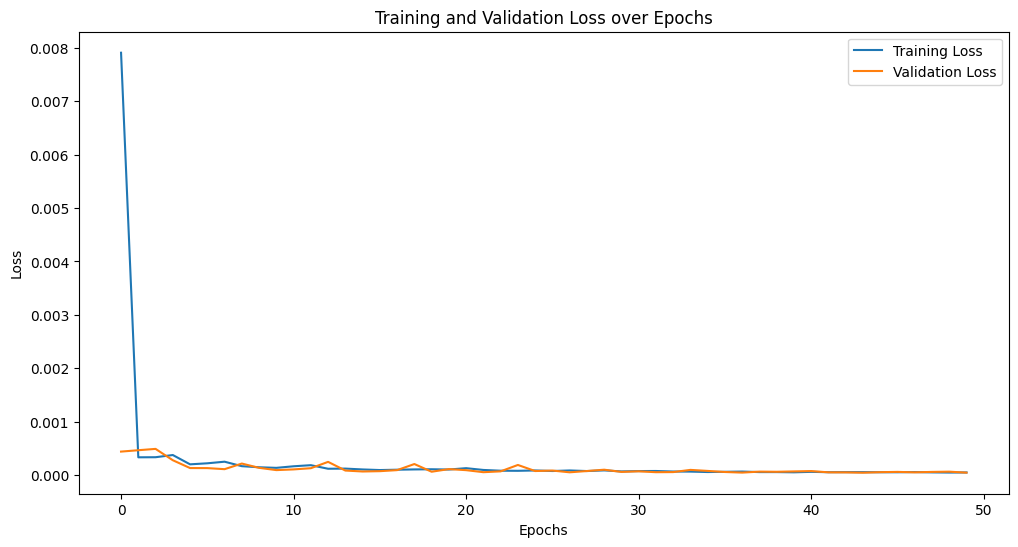

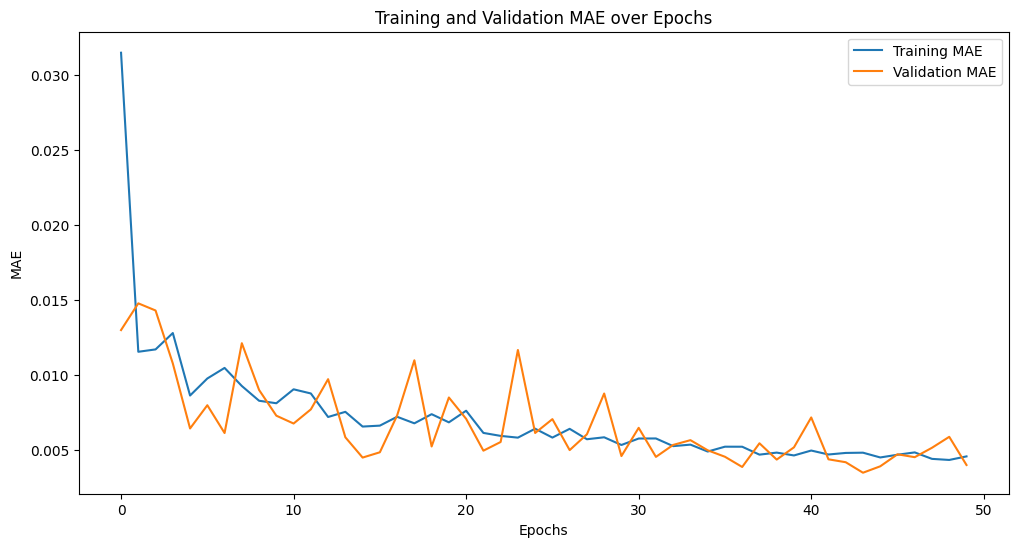

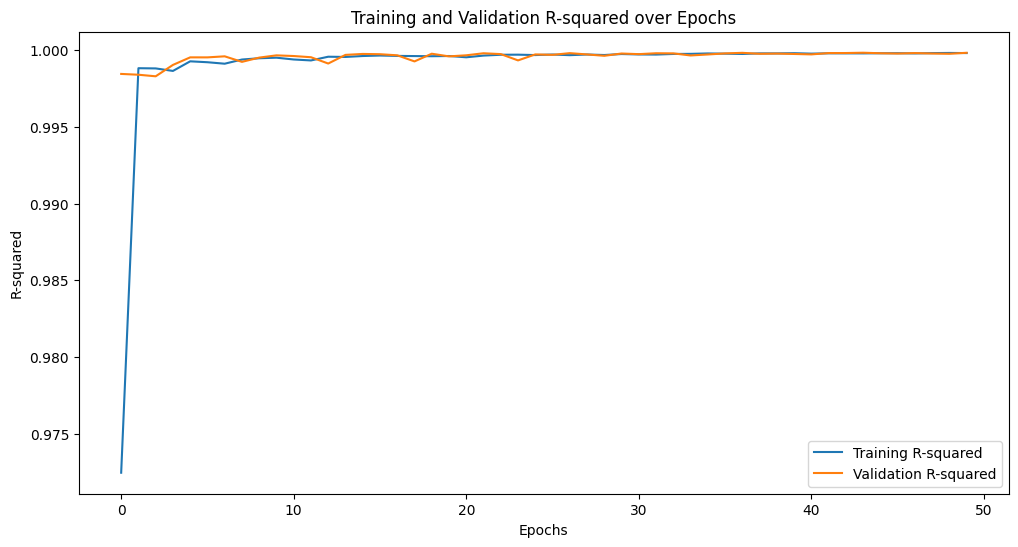

In [22]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable containing the training history
# You can access 'history.history' for loss and metrics values

# Plotting Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plotting R-squared
plt.figure(figsize=(12, 6))
plt.plot(history.history['r_squared'], label='Training R-squared')
plt.plot(history.history['val_r_squared'], label='Validation R-squared')
plt.title('Training and Validation R-squared over Epochs')
plt.xlabel('Epochs')
plt.ylabel('R-squared')
plt.legend()
plt.show()

214/214 [==============================] - 2s 10ms/step
MAE of Train Dataset = 88326.72131669767 pip
MAE of Test Dataset = 95165.89921600265 pip
Mean absolute error = 9.516589921600266
Mean squared error = 269.34447539904755
Median absolute error = 6.661216037352915
Explained variance score = 0.9998476007255571
R2 score = 0.9998388561997201
Root Mean squared error = 16.41171762488764


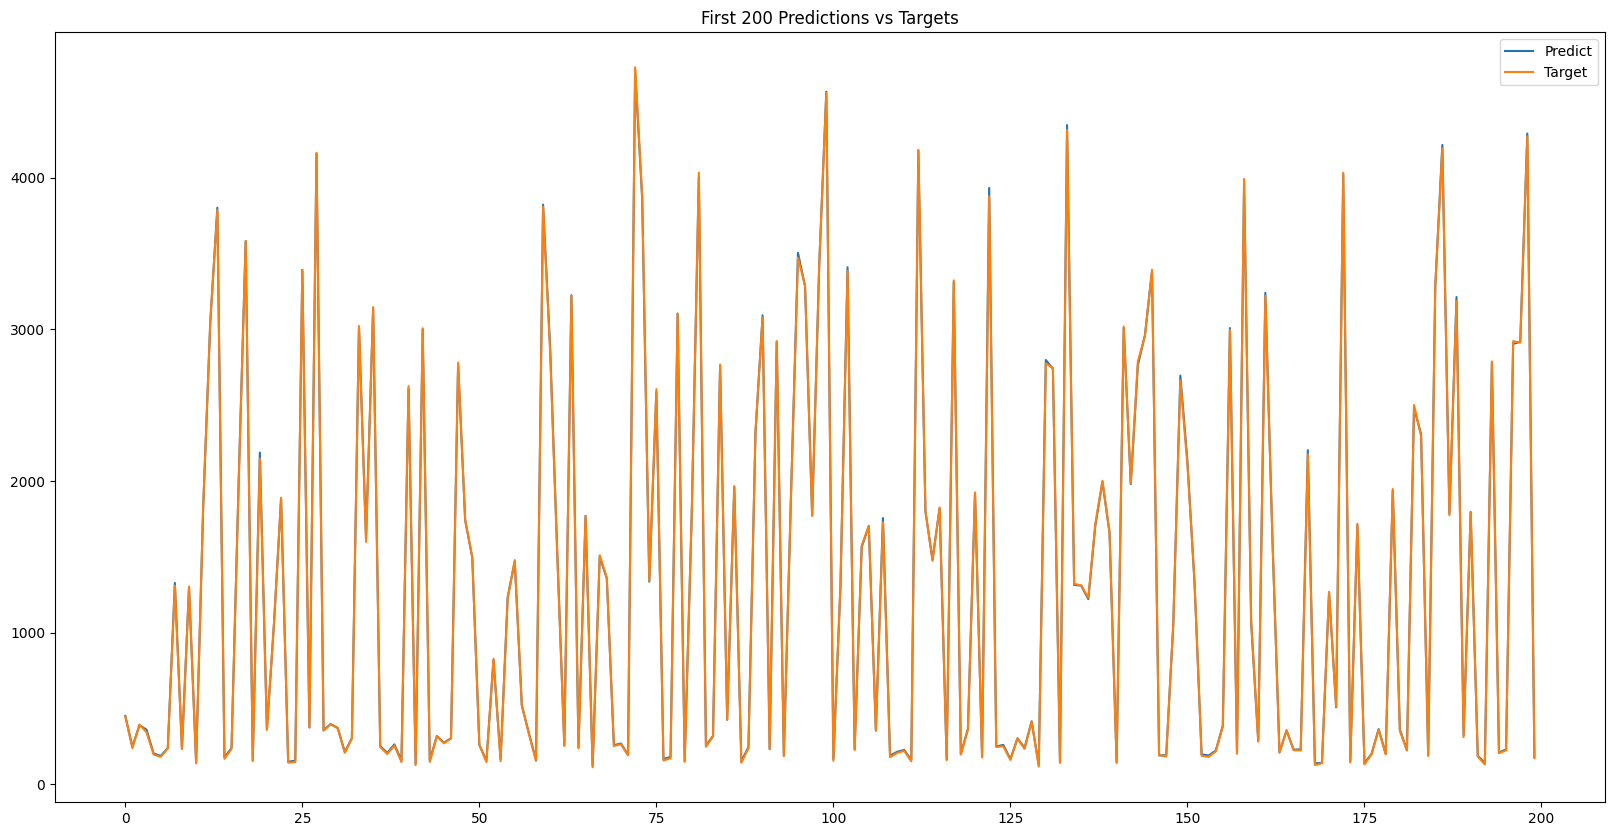

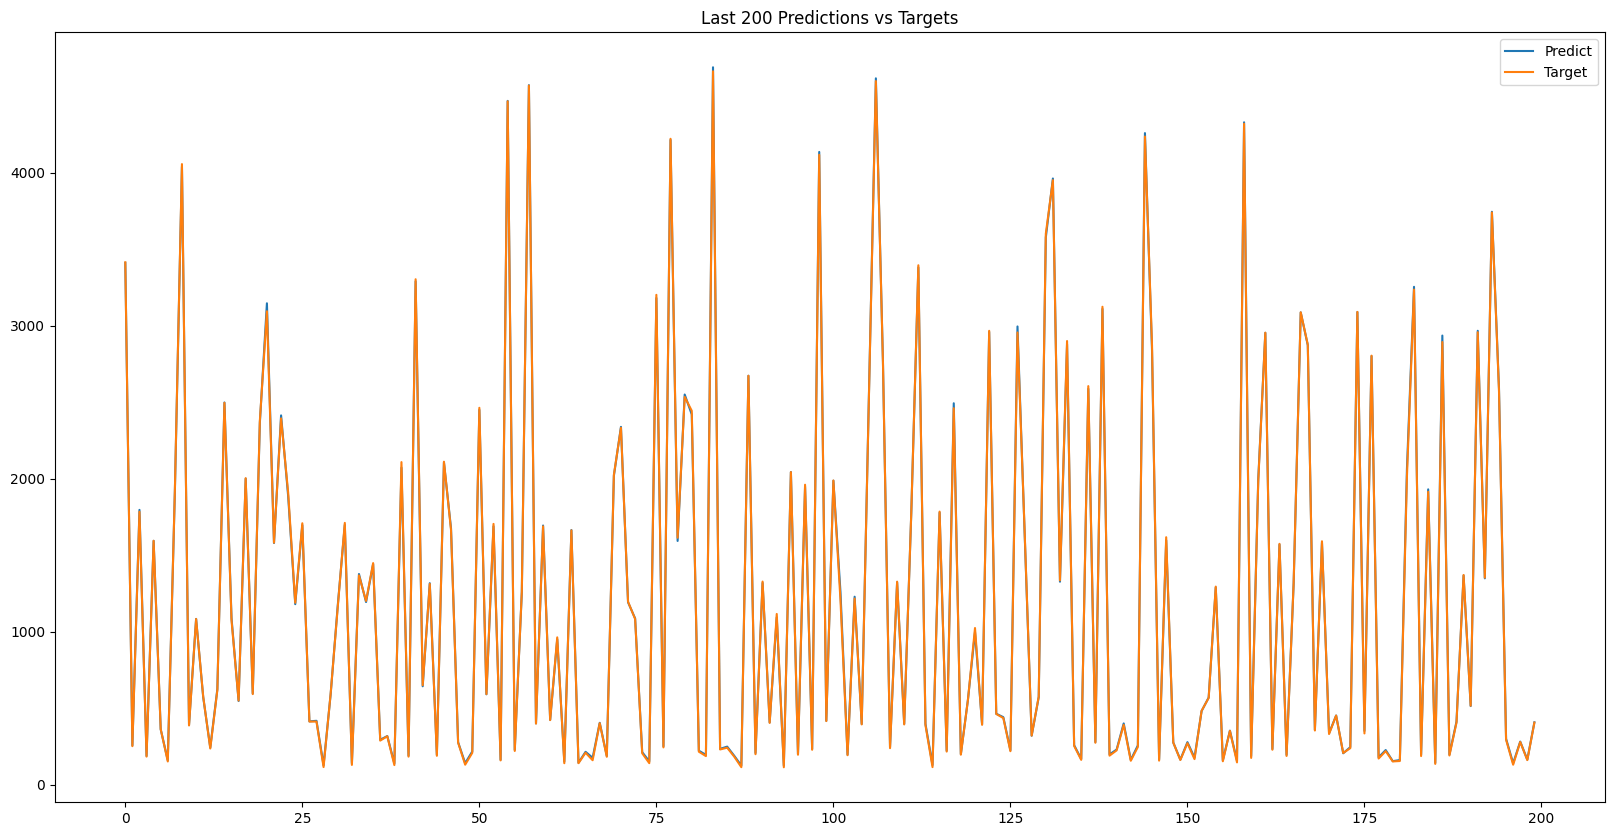

32/32 [==============================] - 0s 12ms/step


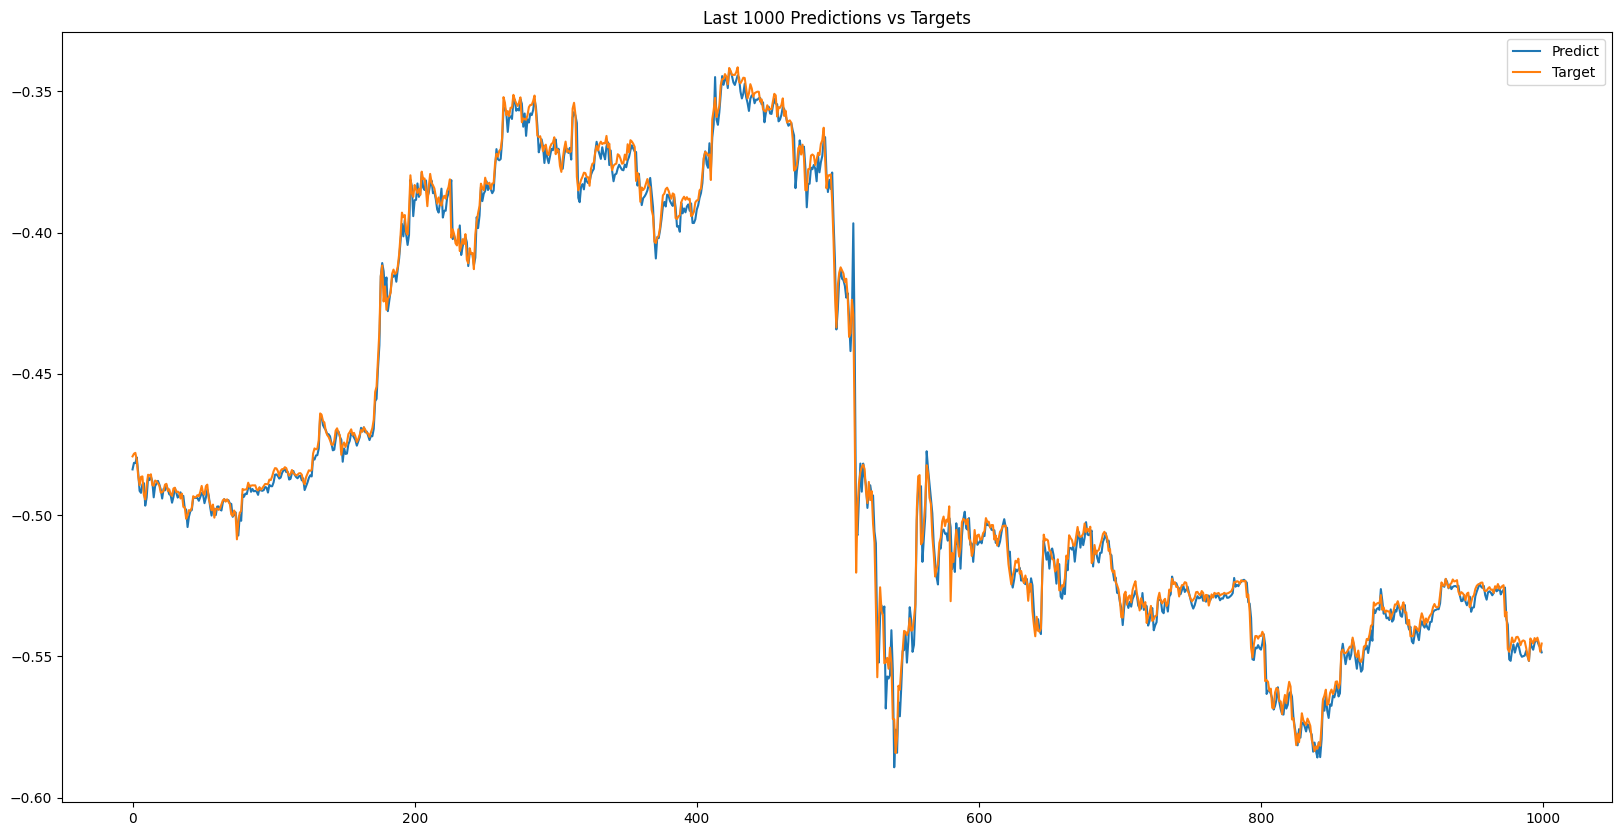

In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
import sklearn.preprocessing as preprocessing
import sklearn.metrics as sm
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

def plot_predictions(targets, predictions, title='Predictions vs Targets', legend=['Predict', 'Target']):
    plt.figure(figsize=(20, 10))
    plt.plot(predictions)
    plt.plot(targets)
    plt.legend(legend)
    plt.title(title)
    plt.show()

def plot_last_values(model, X, y, num_values=1000, title='Last Values Predictions vs Targets'):
    last_values = X[-num_values:, :, :]
    predict_last_values = model.predict(last_values)
    last_values_y = y[-num_values:]

    plot_predictions(last_values_y, predict_last_values, title=title)


def evaluate_and_plot_regression_model(model, X_train, X_test, y_train, y_test, data_df):
    # Make predictions
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Normalize the 'Close' values
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    close11 = min_max_scaler.fit_transform(data_df['close'].values.reshape(-1, 1))

    y_train = y_train.reshape((-1, 1))
    y_test = y_test.reshape((-1, 1))

    # Invert predictions to original scale
    trainPredict1 = min_max_scaler.inverse_transform(trainPredict)
    trainY1 = min_max_scaler.inverse_transform(y_train)
    testPredict1 = min_max_scaler.inverse_transform(testPredict)
    testY1 = min_max_scaler.inverse_transform(y_test)

    # Calculate Mean Absolute Error
    MAE1 = mean_absolute_error(trainY1, trainPredict1)
    MAE2 = mean_absolute_error(testY1, testPredict1)

    print("MAE of Train Dataset =", MAE1 * 1e4 ,'pip')
    print("MAE of Test Dataset =", MAE2 * 1e4,'pip')

    # Calculate additional metrics
    print("Mean absolute error =", sm.mean_absolute_error(testY1, testPredict1))
    print("Mean squared error =", sm.mean_squared_error(testY1, testPredict1))
    print("Median absolute error =", sm.median_absolute_error(testY1, testPredict1))
    print("Explained variance score =", sm.explained_variance_score(testY1, testPredict1))
    print("R2 score =", sm.r2_score(testY1, testPredict1))
    print("Root Mean squared error =", np.sqrt(sm.mean_squared_error(testY1, testPredict1)))

    # Plot predictions
    plot_predictions(testY1[:200], testPredict1[:200], title='First 200 Predictions vs Targets', legend=['Predict', 'Target'])
    plot_predictions(testY1[-200:], testPredict1[-200:], title='Last 200 Predictions vs Targets', legend=['Predict', 'Target'])

    # Plot last values
    plot_last_values(model, X, y, num_values=1000, title='Last 1000 Predictions vs Targets')

# Example usage:
evaluate_and_plot_regression_model(model, X_train, X_test, y_train, y_test, data_df)
